# Produces graphs like CMD, L functions etc.

In [129]:
%matplotlib inline
import numpy as np
from random import randint
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic as binstat
from astropy.stats.histogram import knuth_bin_width
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [78]:
# Read in the file with the clean data
clean_file = 'good_data_flagged.csv'
clean_data = ascii.read(clean_file, data_start=1)
print(len(clean_data))
#print(np.max(clean_data['mag_36_1']))
#print(np.max(clean_data['mag_36_3']))
#print(np.max(clean_data['mag_36_4']))
#print(np.max(clean_data['mag_45_1']))
#print(np.max(clean_data['mag_45_3']))
#print(np.max(clean_data['mag_45_4']))

# Read in background M31 file
bgd_file = 'good_bgd_data.csv'
bgd_data = ascii.read(bgd_file, data_start=1)
print(len(bgd_data))
#print(np.max(bgd_data['mag_36_0']))
#print(np.max(bgd_data['mag_45_0']))

# Read in unclean data
unclean_file = 'unclean_data.csv'
unclean_data = ascii.read(unclean_file, data_start=1)
print(len(unclean_data))

scale_M31_M32 = len(clean_data)/len(bgd_data)
print(scale_M31_M32)

1091
2242
1387
0.48661909009812665


# Low_variables i.e. anything classed as variable (v>=1.4)

36_mean:  [  0.   3.  10.  85. 255. 288. 275. 154.  21.   0.   0.   0.]
45_mean:  [  2.   2.  13.  42. 164. 235. 225. 256. 144.   8.   0.   0.]

36_mean corrected [ -1.   2.   1.  59. 164. 143.  90.  -6. -32.  -4.  -0.   0.]
45_mean corrected [ -0.  -1.   8.  29. 108. 148.  95. 104.  -6. -57.  -7.   0.]

Number of ALL variable sources in the catalogue: 99

36_mean variables:  [ 0.  2.  6. 25. 25. 22. 14.  5.  0.  0.  0.  0.]
45_mean variables:  [ 2.  1.  8. 16. 23. 23. 16.  8.  2.  0.  0.  0.]


Text(0.5, 1.0, 'Variables per magnitude bin')

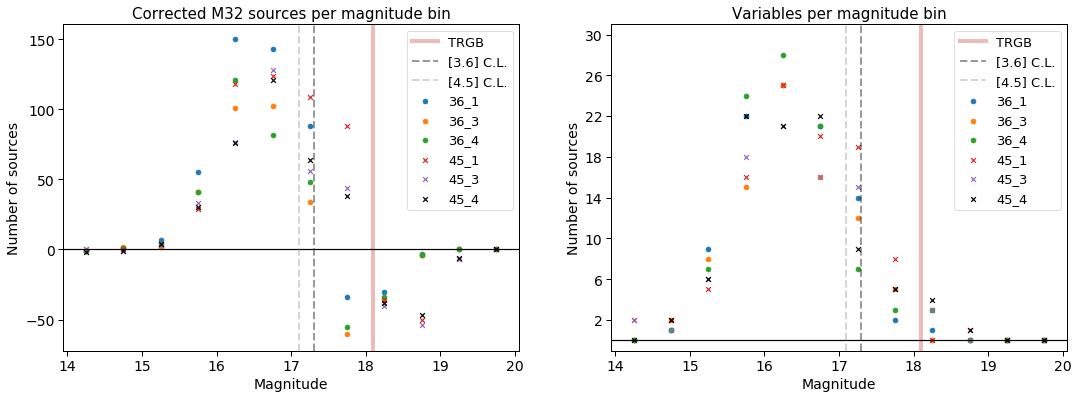

In [100]:
bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find C_i_M31
bin_counts_36_0, bin_edges_36_0, binnumber_36_0 = binstat(bgd_data['mag_36_0'],values=None,statistic='count',bins=bins_mag)
#print("36_0: ",bin_counts_36_0)
bin_counts_45_0, bin_edges_45_0, binnumber_45_0 = binstat(bgd_data['mag_45_0'],values=None,statistic='count',bins=bins_mag)
#print("45_0: ",bin_counts_45_0)

# Find C_i_M32
bin_counts_36_mean, bin_edges_36_mean, binnumber_36_mean = binstat(clean_data['mean_mag_36'],values=None,statistic='count',bins=bins_mag)
print("36_mean: ",bin_counts_36_mean)
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(clean_data['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
print("45_mean: ",bin_counts_45_mean)
# Don't need to remove bad data here as we are only counting sources in the specified region (!=-99)
bin_counts_36_1, bin_edges_36_1, binnumber_36_1 = binstat(clean_data['mag_36_1'],values=None,statistic='count',bins=bins_mag)
#print("36_1: ",bin_counts_36_1)
bin_counts_45_1, bin_edges_45_1, binnumber_45_1 = binstat(clean_data['mag_45_1'],values=None,statistic='count',bins=bins_mag)
#print("45_1: ",bin_counts_45_1)
bin_counts_36_3, bin_edges_36_3, binnumber_36_3 = binstat(clean_data['mag_36_3'],values=None,statistic='count',bins=bins_mag)
#print("36_3: ",bin_counts_36_3)
bin_counts_45_3, bin_edges_45_3, binnumber_45_3 = binstat(clean_data['mag_45_3'],values=None,statistic='count',bins=bins_mag)
#print("45_3: ",bin_counts_45_3)
bin_counts_36_4, bin_edges_36_4, binnumber_36_4 = binstat(clean_data['mag_36_4'],values=None,statistic='count',bins=bins_mag)
#print("36_4: ",bin_counts_36_4)
bin_counts_45_4, bin_edges_45_4, binnumber_45_4 = binstat(clean_data['mag_45_4'],values=None,statistic='count',bins=bins_mag)
#print("45_4: ",bin_counts_45_4)

cf_list_36_M31 = np.array([0.986878793,0.989802525,0.986566186,0.977756286,0.971537949,0.952799479,
                         0.912958115,0.833938594,0.730043061,0.608327912,0.43113577,0.276047611])
cf_list_45_M31 = np.array([0.99396608,0.992516675,0.98988764,0.981939473,0.970317793,0.929207841,
                         0.861268781,0.776867628,0.663057531,0.483034258,0.302808898,0.205102551])
cf_list_36_M32 = np.array([0.987698868,0.990127852,0.982634338,0.971949057,0.95539281,0.916341146,
                       0.849149215,0.737867283,0.612454455,0.457784285,0.297650131,0.198858075])
cf_list_45_M32 = np.array([0.993637847,0.993187579,0.986484259,0.979598498,0.957607995,0.917121588,
                       0.833498513,0.722687668,0.569235794,0.390434358,0.260214008,0.188349515])

# Introduce extra factor of scale_M31_M32~0.5 at the start due to source density ratio
FnCn_array_36 = scale_M31_M32*(2/3)*bin_counts_36_0*(cf_list_36_M32/cf_list_36_M31)
FnCn_array_45 = scale_M31_M32*(2/3)*bin_counts_45_0*(cf_list_45_M32/cf_list_45_M31)

C_36_mean_list = np.around(bin_counts_36_mean-FnCn_array_36,decimals=0)
print("\n36_mean corrected",C_36_mean_list)
C_36_1_list = np.around(bin_counts_36_1-FnCn_array_36,decimals=0)
#print("36_1 corrected",C_36_1_list)
C_36_3_list = np.around(bin_counts_36_3-FnCn_array_36,decimals=0)
#print("36_3 corrected",C_36_3_list)
C_36_4_list = np.around(bin_counts_36_4-FnCn_array_36,decimals=0)
#print("36_4 corrected",C_36_4_list)

C_45_mean_list = np.around(bin_counts_45_mean-FnCn_array_45,decimals=0)
print("45_mean corrected",C_45_mean_list)
C_45_1_list = np.around(bin_counts_45_1-FnCn_array_45,decimals=0)
#print("45_1 corrected",C_45_1_list)
C_45_3_list = np.around(bin_counts_45_3-FnCn_array_45,decimals=0)
#print("45_3 corrected",C_45_3_list)
C_45_4_list = np.around(bin_counts_45_4-FnCn_array_45,decimals=0)
#print("45_4 corrected",C_45_4_list)

# Add together flags of variability to get how many pairs out of a possible 3 a source is variable in
clean_data['low_variable_times']=clean_data['low_variable_1_3']+clean_data['low_variable_1_4']+clean_data['low_variable_3_4']

# Find number of variables in each bin for each epoch pair
low_variable_source_idx = np.where(clean_data['low_variable_times']>0)

print("\nNumber of ALL variable sources in the catalogue:",len(low_variable_source_idx[0]))
variables_36_mean,edg,binn = binstat(clean_data['mean_mag_36'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("\n36_mean variables: ",variables_36_mean)
variables_36_1,edg,binn = binstat(clean_data['mag_36_1'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_1 variables: ",variables_36_1)
variables_36_3,edg,binn = binstat(clean_data['mag_36_3'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_3 variables: ",variables_36_3)
variables_36_4,edg,binn = binstat(clean_data['mag_36_4'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("36_4 variables: ",variables_36_4)

variables_45_mean,edg,binn = binstat(clean_data['mean_mag_45'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_mean variables: ",variables_45_mean)
variables_45_1,edg,binn = binstat(clean_data['mag_45_1'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_1 variables: ",variables_45_1)
variables_45_3,edg,binn = binstat(clean_data['mag_45_3'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_3 variables: ",variables_45_3)
variables_45_4,edg,binn = binstat(clean_data['mag_45_4'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
#print("45_4 variables: ",variables_45_4)


# Plot scatter graph showing each element of the corrected list for each filter/epoch combo
rangex = bins_mag+(20-14)/(12*2)
x=rangex[0:len(rangex)-1]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=13)
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.scatter(x,C_36_1_list,label='36_1',marker='o')
plt.scatter(x,C_36_3_list,label='36_3',marker='o')
plt.scatter(x,C_36_4_list,label='36_4',marker='o')
plt.scatter(x,C_45_1_list,label='45_1',marker='x')
plt.scatter(x,C_45_3_list,label='45_3',marker='x')
plt.scatter(x,C_45_4_list,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2, label='[3.6] C.L.')
plt.axvline(x=17.1, color=sns.xkcd_rgb["grey"], linestyle='--', alpha=0.4, linewidth=2, label='[4.5] C.L.')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Corrected M32 sources per magnitude bin',fontsize=15)

plt.subplot(1,2,2)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.scatter(x,variables_36_1,label='36_1',marker='o')
plt.scatter(x,variables_36_3,label='36_3',marker='o')
plt.scatter(x,variables_36_4,label='36_4',marker='o')
plt.scatter(x,variables_45_1,label='45_1',marker='x')
plt.scatter(x,variables_45_3,label='45_3',marker='x')
plt.scatter(x,variables_45_4,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2, label='[3.6] C.L.')
plt.axvline(x=17.1, color=sns.xkcd_rgb["grey"], linestyle='--', alpha=0.4, linewidth=2, label='[4.5] C.L.')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.yticks(np.arange(-2,34,4))
plt.ylim(-1,31)
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Variables per magnitude bin',fontsize=15)

[ -1.   2.   1.  59. 164. 143.  90.  -6. -32.  -4.  -0.   0.]
[ 0.  2.  6. 25. 25. 22. 14.  5.  0.  0.  0.  0.]

 14.0 - 14.5
Current M32 sources: 0
Corrected M32 sources: -1
Variable M32 sources: 0
	Difference in populations!
	Number of sources to remove (all sources): 0
	Need to get rid of some variables!
(array([], dtype=int64),)
Currently saved variables: 0
Currently removed variables: 0
Number of variables still in this bin: 0
Number of sources now in this bin: 0

 14.5 - 15.0
Current M32 sources: 3
Corrected M32 sources: 2
Variable M32 sources: 2
	Keep all variables!
	Number of non-variable sources to remove: 1
Currently removed: 0
Now removed: 1
Number of variables still in this bin: 2
Number of sources now in this bin: 2

 15.0 - 15.5
Current M32 sources: 10
Corrected M32 sources: 1
Variable M32 sources: 6
	Need to get rid of some variables!
(array([144, 244, 603, 637, 677, 725], dtype=int64),)
Currently saved variables: 0
Currently removed variables: 6
Now saved: 1
Number of v

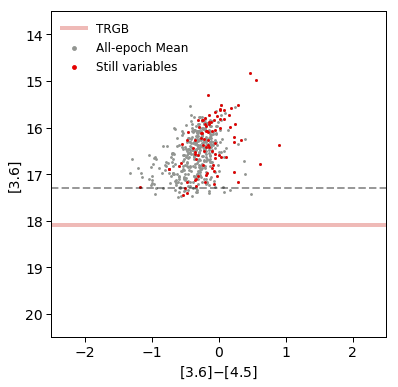

In [172]:
# Account for contamination above
print(C_36_mean_list)
print(variables_36_mean)
clean_data['remove?']=0
for i in range(len(C_36_mean_list)):
    print("\n",bin_edges_36_mean[i],"-",bin_edges_36_mean[i+1])
    print("Current M32 sources:",int(bin_counts_36_mean[i]))
    print("Corrected M32 sources:",int(C_36_mean_list[i]))
    print("Variable M32 sources:",int(variables_36_mean[i]))
    
    this_bin_all_idx = np.where((clean_data['mean_mag_36']>=bin_edges_36_mean[i])&
                                (clean_data['mean_mag_36']<bin_edges_36_mean[i+1]))
    #print(len(this_bin_all_idx[0]))
    
    if C_36_mean_list[i]<0:
        print("\tDifference in populations!")
        # Should get rid of all sources in this bin
        print("\tNumber of sources to remove (all sources):",len(this_bin_all_idx[0]))
        clean_data['remove?'][this_bin_all_idx]=1
        
    if C_36_mean_list[i]>=variables_36_mean[i]:
        if variables_36_mean[i]>0:
            print("\tKeep all variables!")
            remove_some = int(bin_counts_36_mean[i])-int(C_36_mean_list[i])
            print("\tNumber of non-variable sources to remove:",remove_some)
            currently_removed_idx = np.where(clean_data['remove?'][this_bin_all_idx]==1)
            print("Currently removed:",len(currently_removed_idx[0]))
            while len(currently_removed_idx[0]) < remove_some:
                value = randint(0, len(this_bin_all_idx[0])-1)
                catalogue_row = this_bin_all_idx[0][value]
                #print(catalogue_row)
                # If source isn't already up to be removed and isn't a variable
                if ((clean_data['remove?'][catalogue_row]==0) & (clean_data['low_variable_times'][catalogue_row]==0)):
                    clean_data['remove?'][catalogue_row]=1
                    #print(clean_data['remove?'][catalogue_row])
                    #print("DONE")
                    now_removed_idx = np.where(clean_data['remove?'][this_bin_all_idx]==1)
                    #print("Now removed:",len(now_removed_idx[0]))
                if len(now_removed_idx[0]) == remove_some:
                    print("Now removed:",len(now_removed_idx[0]))
                    break
                    
            still_variable_idx=np.where((clean_data['low_variable_times'][this_bin_all_idx]>0)&
                                        (clean_data['remove?'][this_bin_all_idx]==0))
            print("Number of variables still in this bin:",len(still_variable_idx[0]))
            still_in_bin_idx=np.where(clean_data['remove?'][this_bin_all_idx]==0)
            print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
            
        else:
            print("\tNo variables to remove here.")
            
    else:
        print("\tNeed to get rid of some variables!")
        # Pretend you'll remove everything and then recover the right amount of variables (random)
        clean_data['remove?'][this_bin_all_idx]=1
        variables_here_idx = np.where((clean_data['low_variable_times']>0)&
                                      (clean_data['mean_mag_36']>=bin_edges_36_mean[i])&
                                      (clean_data['mean_mag_36']<bin_edges_36_mean[i+1]))
        print(variables_here_idx)
        #print(len(variables_here_idx[0]))
        currently_saved_idx = np.where(clean_data['remove?'][this_bin_all_idx]==0)
        currently_removed_idx = np.where((clean_data['remove?'][this_bin_all_idx]==1)&(clean_data['low_variable_times'][this_bin_all_idx]>0))
        print("Currently saved variables:",len(currently_saved_idx[0]))
        print("Currently removed variables:",len(currently_removed_idx[0]))
        while len(currently_saved_idx[0]) < C_36_mean_list[i]:
            value = randint(0, len(variables_here_idx[0])-1)
            catalogue_row = variables_here_idx[0][value]
            #print(value)
            #print(catalogue_row)
            # If source isn't already up to be saved
            #print(clean_data['remove?'][catalogue_row])
            if (clean_data['remove?'][catalogue_row]==1):
                clean_data['remove?'][catalogue_row]=0
                now_saved_idx = np.where(clean_data['remove?'][this_bin_all_idx]==0)
                #print("Now saved:",len(now_saved_idx[0]))
            if len(now_saved_idx[0]) == C_36_mean_list[i]:
                print("Now saved:",len(now_saved_idx[0]))
                break
                    
        still_variable_idx=np.where((clean_data['low_variable_times'][this_bin_all_idx]>0)&
                                    (clean_data['remove?'][this_bin_all_idx]==0))
        print("Number of variables still in this bin:",len(still_variable_idx[0]))
        still_in_bin_idx=np.where(clean_data['remove?'][this_bin_all_idx]==0)
        print("Number of sources now in this bin:",len(still_in_bin_idx[0]))
    
    
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,6))

keep_idx = np.where(clean_data['remove?']==0)
still_variable_idx = np.where((clean_data['low_variable_times']>0)&(clean_data['remove?']==0))
plt.scatter(clean_data['mean_mag_36'][keep_idx]-clean_data['mean_mag_45'][keep_idx], clean_data['mean_mag_36'][keep_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
plt.scatter(clean_data['mean_mag_36'][still_variable_idx]-clean_data['mean_mag_45'][still_variable_idx], clean_data['mean_mag_36'][still_variable_idx], s=3.9,color=sns.xkcd_rgb['red'], label="Still variables")
plt.ylabel("[3.6]", fontsize=14)
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

corr_36_cat = clean_data[keep_idx]

In [176]:
# Now look at 4.5 stats using this corr_36_cat

bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find number of variables in each bin for each epoch pair
low_variable_source_idx = np.where(corr_36_cat['low_variable_times']>0)
print("\nNumber of ALL variable sources in the catalogue:",len(low_variable_source_idx[0]))

# Find C_i_M32 from corr_36_cat
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(corr_36_cat['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
print("45_mean: ",bin_counts_45_mean)

variables_45_mean,edg,binn = binstat(corr_36_cat['mean_mag_45'][low_variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_mean variables: ",variables_45_mean)

print("45_mean corrected: [ -0.  -1.   8.  29. 108. 148.  95. 104.  -6. -57.  -7.   0.]")

# Account for contamination above
for i in range(len(C_45_mean_list)):
    print("\n",bin_edges_45_mean[i],"-",bin_edges_45_mean[i+1])
    print("Current M32 sources:",int(bin_counts_45_mean[i]))
    print("Corrected M32 sources:",int(C_45_mean_list[i]))
    print("Variable M32 sources:",int(variables_45_mean[i]))


Number of ALL variable sources in the catalogue: 89
45_mean:  [  2.   0.   7.  26. 114. 129.  99.  66.  16.   0.   0.   0.]
45_mean variables:  [ 2.  0.  5. 15. 23. 23. 13.  7.  1.  0.  0.  0.]
45_mean corrected: [ -0.  -1.   8.  29. 108. 148.  95. 104.  -6. -57.  -7.   0.]

 14.0 - 14.5
Current M32 sources: 2
Corrected M32 sources: 0
Variable M32 sources: 2

 14.5 - 15.0
Current M32 sources: 0
Corrected M32 sources: -1
Variable M32 sources: 0

 15.0 - 15.5
Current M32 sources: 7
Corrected M32 sources: 8
Variable M32 sources: 5

 15.5 - 16.0
Current M32 sources: 26
Corrected M32 sources: 29
Variable M32 sources: 15

 16.0 - 16.5
Current M32 sources: 114
Corrected M32 sources: 108
Variable M32 sources: 23

 16.5 - 17.0
Current M32 sources: 129
Corrected M32 sources: 148
Variable M32 sources: 23

 17.0 - 17.5
Current M32 sources: 99
Corrected M32 sources: 95
Variable M32 sources: 13

 17.5 - 18.0
Current M32 sources: 66
Corrected M32 sources: 104
Variable M32 sources: 7

 18.0 - 18.5
Cu

In [136]:
idx = np.where(clean_data['remove?']==1)
print(idx)
print(len(idx[0]))
print(idx[0][174])

(array([   0,   13,   35,   39,   40,   42,   43,   52,   73,   74,  107,
        119,  121,  133,  135,  137,  145,  166,  179,  193,  198,  213,
        219,  236,  238,  240,  246,  251,  264,  267,  281,  282,  292,
        294,  306,  310,  313,  315,  327,  328,  331,  343,  358,  359,
        377,  387,  400,  420,  425,  426,  432,  436,  438,  439,  451,
        453,  464,  505,  507,  508,  510,  512,  532,  538,  540,  544,
        545,  550,  551,  555,  556,  558,  566,  571,  576,  577,  586,
        589,  590,  595,  597,  599,  600,  609,  612,  615,  638,  641,
        646,  648,  657,  661,  674,  693,  695,  709,  716,  733,  751,
        776,  780,  782,  786,  820,  824,  831,  842,  849,  852,  863,
        870,  874,  894,  897,  902,  908,  912,  917,  927,  959,  965,
        966,  967,  968,  970,  971,  972,  974,  975,  976,  977,  978,
        979,  980,  981,  982,  983,  984,  986,  987,  989,  991,  996,
       1000, 1002, 1005, 1006, 1008, 1009, 1010, 1

Text(0.5, 1.0, 'Variables per magnitude bin')

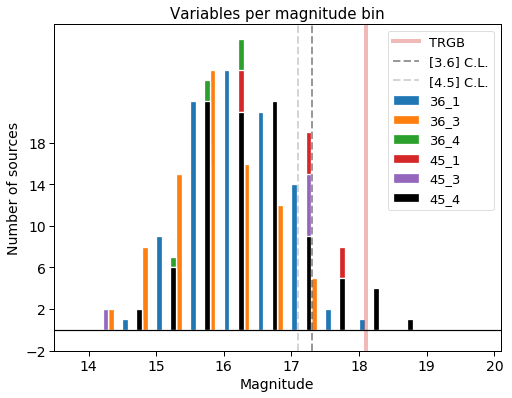

In [82]:
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=13)
plt.figure(figsize=(8,6))

plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.bar(rangex[0:len(rangex)-1]-5/24,height=variables_36_1,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='36_1')
plt.bar(rangex[0:len(rangex)-1]-5/12,height=variables_36_3,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='36_3')
plt.bar(rangex[0:len(rangex)-1],height=variables_36_4,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='36_4')
plt.bar(rangex[0:len(rangex)-1],height=variables_45_1,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='45_1')
plt.bar(rangex[0:len(rangex)-1],height=variables_45_3,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='45_3')
plt.bar(rangex[0:len(rangex)-1],height=variables_45_4,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       width=(20-14)/(12*6),alpha=1.0,label='45_4',color='black')
#plt.scatter(x,variables_36_1,label='36_1',marker='o')
#plt.scatter(x,variables_36_3,label='36_3',marker='o')
#plt.scatter(x,variables_36_4,label='36_4',marker='o')
#plt.scatter(x,variables_45_1,label='45_1',marker='x')
#plt.scatter(x,variables_45_3,label='45_3',marker='x')
#plt.scatter(x,variables_45_4,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2, label='[3.6] C.L.')
plt.axvline(x=17.1, color=sns.xkcd_rgb["grey"], linestyle='--', alpha=0.4, linewidth=2, label='[4.5] C.L.')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.yticks(np.arange(-2,20,4))
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Variables per magnitude bin',fontsize=15)

In [75]:
bin_idx=np.where((bgd_data['mag_45_0']<18)&(bgd_data['mag_45_0']>=17.5))
print(len(bin_idx[0]))

503


In [83]:
# Find variable sources!
# Class a source as variable if it shows variability in at least one epoch pair
# Variable source index defined above in variable section (histogram)
variable_data = clean_data[variable_source_idx]
print("Number of variables identified:",len(variable_data))

Number of variables identified: 99


# Dust estimates!

Number of variable sources:  99
Number of variable sources as % of entire catalogue:  9.074243813015583
Variable in all 3 pairs of epochs:  4

Dust production rate:  2.24e-10 M_sol/yr
Dust production rate limits:  8.17e-11  -  6.12e-10 M_sol/yr

Dust production rate:  2.68e-10 M_sol/yr
Dust production rate limits:  1.13e-10  -  6.36e-10 M_sol/yr


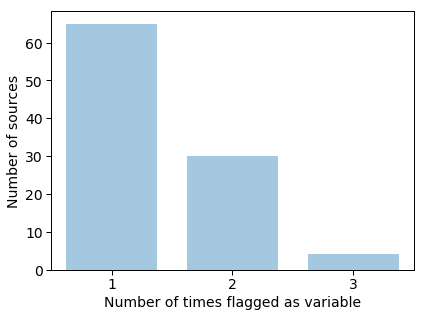

In [84]:
# Estimate dust budget for variable stars

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['low_variable_times'][np.where(clean_data['low_variable_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as variable')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence variables...

# Take mean colour of all sources that are variable (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a variable source (not just epochs classes as variables)
print("Number of variable sources: ",len(low_variable_source_idx[0]))
print("Number of variable sources as % of entire catalogue: ",100*len(low_variable_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['low_variable_times']==3)
print("Variable in all 3 pairs of epochs: ",len(test_idx[0]))

# Find sources claiming to be variable in a number of pairs of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][low_variable_source_idx]-clean_data['mean_mag_45'][low_variable_source_idx]
mean_colour_variables_123 = np.mean(mean_colour_array_123)
std_colour_variables_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_variables_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123-std_colour_variables_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123+std_colour_variables_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['low_variable_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_variables_23 = np.mean(mean_colour_array_23)
std_colour_variables_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_variables_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23-std_colour_variables_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23+std_colour_variables_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

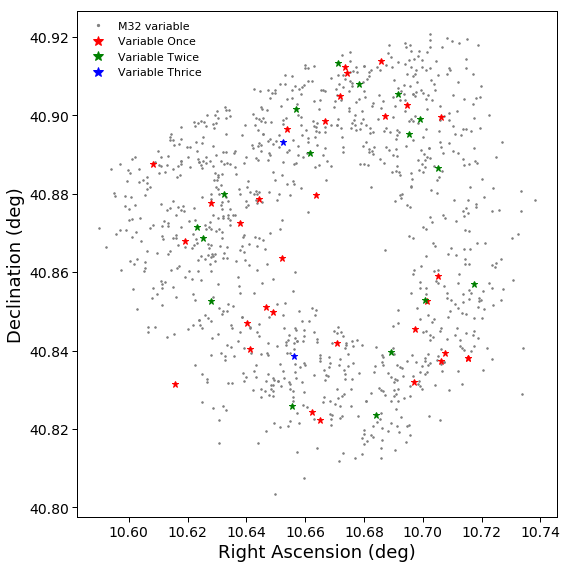

In [39]:
# Location plot of variables split by the histogram above

once_idx = np.where(variable_data['low_variable_times']==1)
twice_idx = np.where(variable_data['low_variable_times']==2)
thrice_idx = np.where(variable_data['low_variable_times']==3)

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(clean_data['RA'], clean_data['Dec'], '.', color='grey', ms=3, label="M32 variable")
plt.plot(variable_data['RA'][once_idx], variable_data['Dec'][once_idx], '*', color='red', ms=7, label="Variable Once")
plt.plot(variable_data['RA'][twice_idx], variable_data['Dec'][twice_idx], '*', color='green', ms=7, label="Variable Twice")  
plt.plot(variable_data['RA'][thrice_idx], variable_data['Dec'][thrice_idx], '*', color='blue', ms=7, label="Variable Thrice")  

plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.5)
#plt.title('M32 epoch 1',fontsize=18)

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

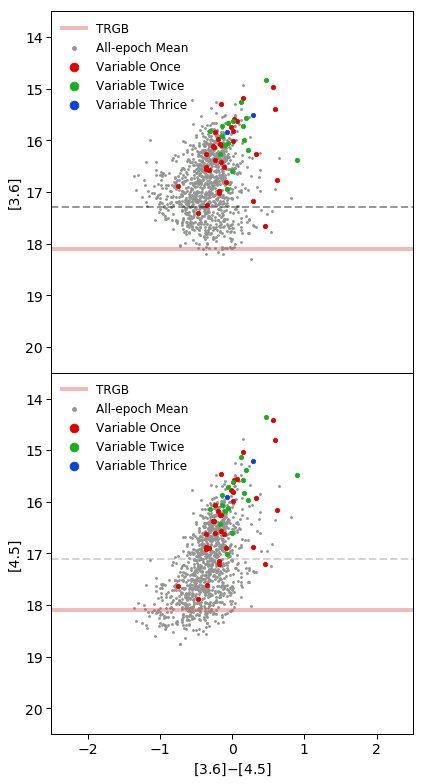

In [13]:
# Mean CMD with variables overplotted according to above histogram

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_36'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_36'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_36'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_45'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_45'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_45'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

Number of evolved sources:  38
Number of evolved sources as % of entire catalogue:  3.483043079743355
evolved in all 3 epochs:  5

Dust production rate:  5.77e-10 M_sol/yr
Dust production rate limits:  2.73e-10  -  1.22e-09 M_sol/yr

Dust production rate:  8.36e-10 M_sol/yr
Dust production rate limits:  3.99e-10  -  1.75e-09 M_sol/yr


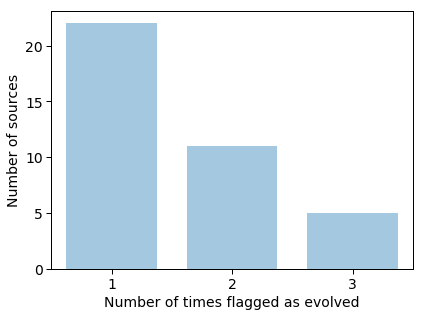

In [14]:
# Estimate dust budget for evoled stars
clean_data['evolved_times']=clean_data['evolved_1']+clean_data['evolved_3']+clean_data['evolved_4']

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['evolved_times'][np.where(clean_data['evolved_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as evolved')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence evolveds...

# Take mean colour of all sources that are evolved (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a evolved source (not just epochs classes as evolved)
evolved_source_idx = np.where(clean_data['evolved_times']>0)
print("Number of evolved sources: ",len(evolved_source_idx[0]))
print("Number of evolved sources as % of entire catalogue: ",100*len(evolved_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['evolved_times']==3)
print("evolved in all 3 epochs: ",len(test_idx[0]))

# Find sources claiming to be evolved in a number of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][evolved_source_idx]-clean_data['mean_mag_45'][evolved_source_idx]
mean_colour_evolveds_123 = np.mean(mean_colour_array_123)
std_colour_evolveds_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123-std_colour_evolveds_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123+std_colour_evolveds_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['evolved_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_evolveds_23 = np.mean(mean_colour_array_23)
std_colour_evolveds_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23-std_colour_evolveds_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23+std_colour_evolveds_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

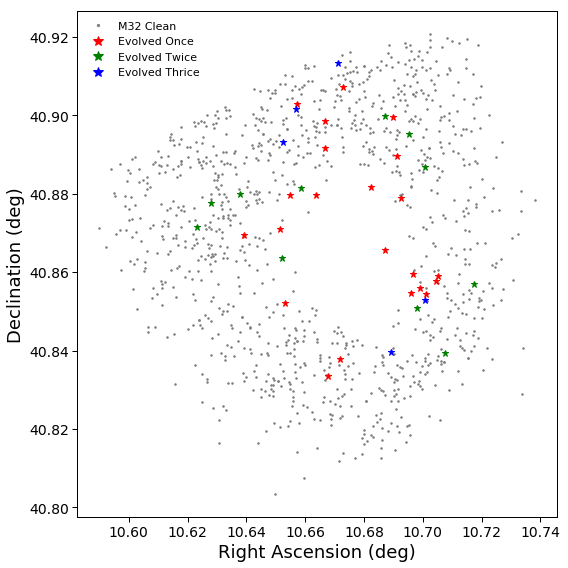

In [38]:
# Location plot of evolved (colour-selected) sources
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

Eonce_idx = np.where(clean_data['evolved_times']==1)
Etwice_idx = np.where(clean_data['evolved_times']==2)
Ethrice_idx = np.where(clean_data['evolved_times']==3)

# Make the actual plot
plt.plot(clean_data['RA'], clean_data['Dec'], '.', color='grey', ms=3, label="M32 Clean")
plt.plot(clean_data['RA'][Eonce_idx], clean_data['Dec'][Eonce_idx], '*', color='red', ms=7, label="Evolved Once")
plt.plot(clean_data['RA'][Etwice_idx], clean_data['Dec'][Etwice_idx], '*', color='green', ms=7, label="Evolved Twice")  
plt.plot(clean_data['RA'][Ethrice_idx], clean_data['Dec'][Ethrice_idx], '*', color='blue', ms=7, label="Evolved Thrice")     
plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=1.5)
#plt.title('M32 epoch 1',fontsize=18)

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

In [41]:
# Set evolved star region

x=0.1 # value from paper
y=16.444 # absolute mag of -8, use mean distance modulus of M32 from A census of orbital properties of the M31 satellites
#Laura L. Watkins, N. Wyn Evans and Glenn van de Ven page 13

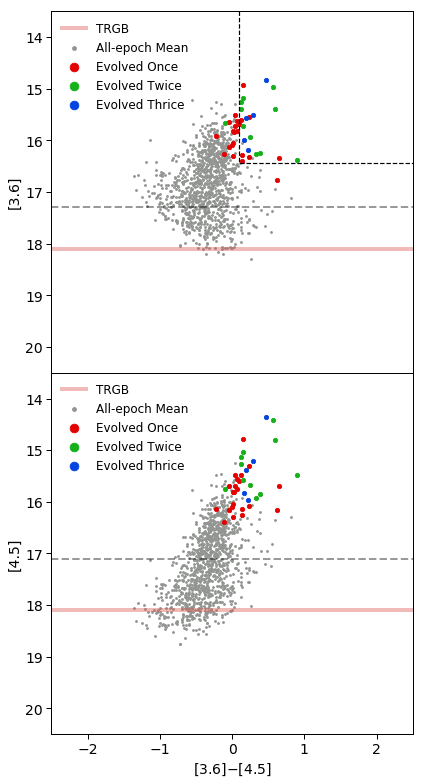

In [43]:
# Mean CMD with evolved sources overplotted according to above histogram

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

xlim = [-2.5,2.5]
ylim = [20.5,13.5]

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot Evolved sources
plt.scatter(clean_data['mean_mag_36'][Eonce_idx]-clean_data['mean_mag_45'][Eonce_idx], clean_data['mean_mag_36'][Eonce_idx],s=19,color=sns.xkcd_rgb['red'],label="Evolved Once")
plt.scatter(clean_data['mean_mag_36'][Etwice_idx]-clean_data['mean_mag_45'][Etwice_idx], clean_data['mean_mag_36'][Etwice_idx],s=19,color=sns.xkcd_rgb['green'],label="Evolved Twice")
plt.scatter(clean_data['mean_mag_36'][Ethrice_idx]-clean_data['mean_mag_45'][Ethrice_idx], clean_data['mean_mag_36'][Ethrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Evolved Thrice")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(xlim)
plt.ylim(ylim)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

# Plot evolved box on 3.6 CMD
# NB: some sources will fall outside the box because this is a mean CMD (but blue sources should ALL be in box)
plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')

plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot Evolved sources
plt.scatter(clean_data['mean_mag_36'][Eonce_idx]-clean_data['mean_mag_45'][Eonce_idx], clean_data['mean_mag_45'][Eonce_idx],s=19,color=sns.xkcd_rgb['red'],label="Evolved Once")
plt.scatter(clean_data['mean_mag_36'][Etwice_idx]-clean_data['mean_mag_45'][Etwice_idx], clean_data['mean_mag_45'][Etwice_idx],s=19,color=sns.xkcd_rgb['green'],label="Evolved Twice")
plt.scatter(clean_data['mean_mag_36'][Ethrice_idx]-clean_data['mean_mag_45'][Ethrice_idx], clean_data['mean_mag_45'][Ethrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Evolved Thrice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(xlim)
plt.ylim(ylim)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

15
35
22


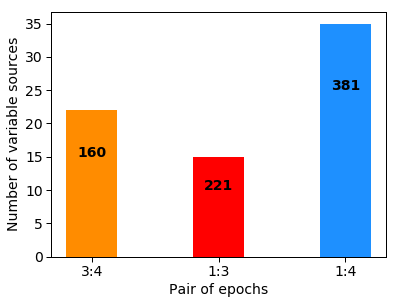

In [15]:
# Histogram of variables in each epoch pair
# NB: can check these numbers from _clean.ipynb when variables were assigned
var_num_1_3 = len((np.where(clean_data['variable_1_3']==1))[0])
print(var_num_1_3)
var_num_1_4 = len((np.where(clean_data['variable_1_4']==1))[0])
print(var_num_1_4)
var_num_3_4 = len((np.where(clean_data['variable_3_4']==1))[0])
print(var_num_3_4)
number_spread = np.array([var_num_3_4,var_num_1_3,var_num_1_4])

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
ig = plt.figure(figsize=(6,4.5))

bars = ('3:4', '1:3', '1:4')
# Choose the position of each barplot on the x-axis
y_pos = [1,3,5]
# Create bars
plt.bar(y_pos, number_spread,color=['darkorange','red','dodgerblue'])
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel("Pair of epochs")
plt.ylabel("Number of variable sources")

# Add baselines to the bars
plt.annotate("160", [1, 15], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("221", [3, 10], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("381", [5, 25], horizontalalignment='center', size=14, color='black',weight='bold')

 
# Show graphic
plt.show()

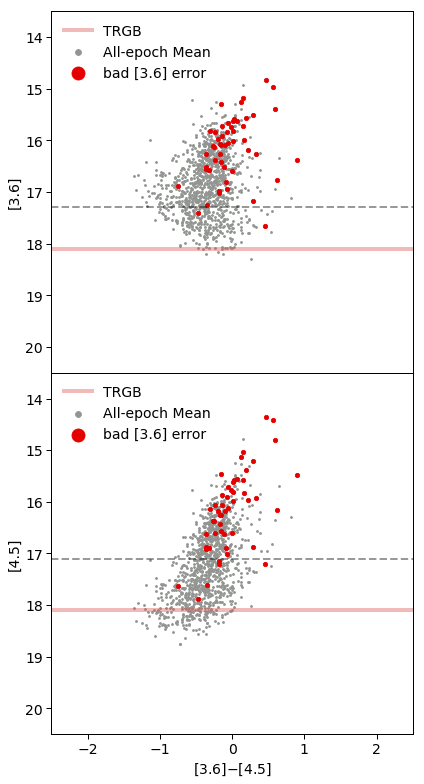

In [16]:
# Mean CMD with variables overplotted

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_36'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_45'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.axhline(y=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

# Variability

In [13]:
# Create a gaussian function
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

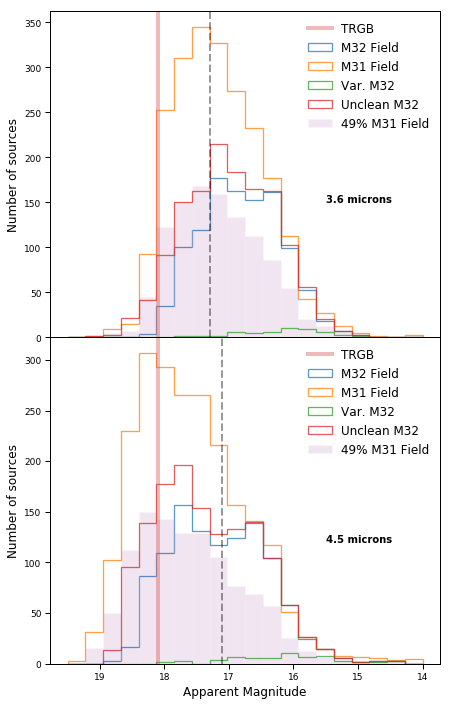

In [44]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values

    # For single column figures:
    width = 3.8
    height = width / 1.7

set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(7, 12))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(14, 19.5, 21)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M32 Field", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
rangex = bins+(19.5-14)/(20*2)
ax1.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='49% M31 Field')
n, edg, patches = ax1.hist(variable_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(unclean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")


#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [15.5, 150], horizontalalignment='left', size='medium', color='black',weight='bold')




n, edg, patches = ax2.hist(clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M32 Field", ls="solid")
n, edg, patches = ax2.hist(bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
ax2.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='49% M31 Field')
n, edg, patches = ax2.hist(variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax2.hist(unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")


ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number of sources", fontsize=12)
#ax2.set_ylim(0,169)

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [15.5, 120], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


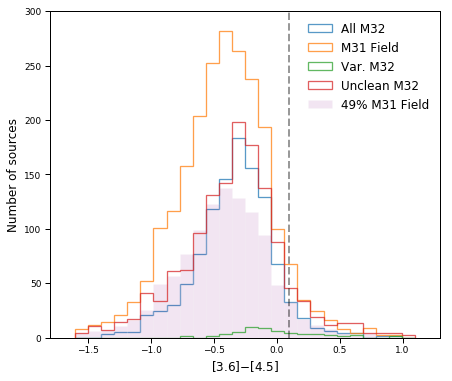

In [45]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(7, 6))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36']-clean_data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36']-clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="All M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
rangex = bins+(1.1+1.6)/(26*2)
plt.bar(x=rangex[0:len(rangex)-1],height=scale_M31_M32*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(1.1+1.6)/26,alpha=0.1,label='49% M31 Field')
n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(unclean_data['mean_mag_36']-unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")

ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of sources", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc='upper right', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.xlim(-1.8,1.3)
plt.ylim(0,300)
plt.show()
plt.close()


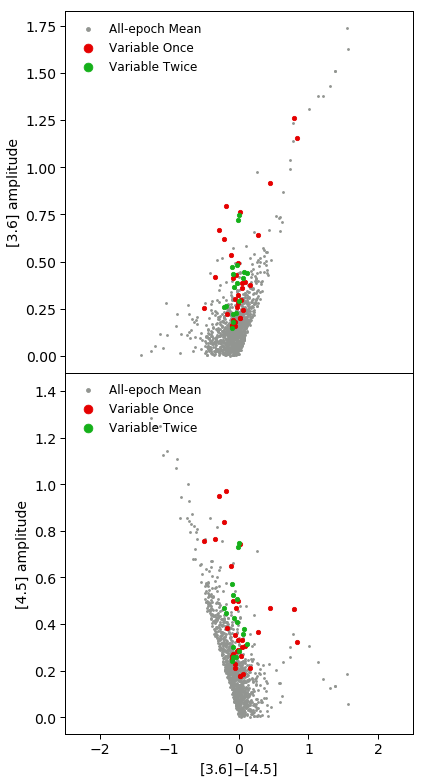

In [48]:
# Plot colour against amplitude for the clean data

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['amp_36']-clean_data['amp_45'], clean_data['amp_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['amp_36'][once_idx]-variable_data['amp_45'][once_idx], variable_data['amp_36'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['amp_36'][twice_idx]-variable_data['amp_45'][twice_idx], variable_data['amp_36'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.ylabel("[3.6] amplitude", fontsize=14)
plt.xlim(-2.5,2.5)
#plt.ylim(20.5,13.5)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(clean_data['amp_36']-clean_data['amp_45'], clean_data['amp_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['amp_36'][once_idx]-variable_data['amp_45'][once_idx], variable_data['amp_45'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['amp_36'][twice_idx]-variable_data['amp_45'][twice_idx], variable_data['amp_45'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5] amplitude", fontsize=14)
plt.xlim(-2.5,2.5)
#plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

# Write variable data to file

In [77]:
# Write out full variable file
#ascii.write(variable_data,'final_variables.csv',format='csv',overwrite=True)

# Write out variable file for VizieR
#ascii.write(variable_data['RA','Dec'],'final_variables_RA_Dec.csv',format='csv',overwrite=True)